### Python libraries
Please activate the Conda environment you created in the terminal command line, and then execute the following commands **line by line** (the third command changes the default pip source to the Tsinghua mirror, which is recommended):
```
conda create -n pt12 python=3.12
conda activate pt12
pip config set global.index-url https://pypi.tuna.tsinghua.edu.cn/simple
pip install numpy
pip install rdkit
pip install ipykernel
pip install fair-esm
pip install matplotlib
pip install scikit-learn
pip install pandas
pip install tqdm
pip install biopython
pip install torch==2.3.1 torchvision==0.18.1 torchaudio==2.3.1 -f https://mirrors.aliyun.com/pytorch-wheels/cu118
pip install torch-geometric


# Enzyme and Substrate Feature Extraction

### Table of Contents
1. **Experimental Preparation and Data Collection**
2. **Introduction to Data Sources for Enzymes and Substrates**
3. **Data Preprocessing and Cleaning**
4. **Compound Feature Extraction Methods**
5. **Sequence Feature Extraction Methods**
6. **Feature Extraction Using Python and Related Bioinformatics Tools**
7. **Clustering Practice**

### 1. Experimental Preparation and Data Collection <a id="experimental-preparation-and-data-collection"></a>

#### 1.1 Objectives
- Understand the methods for feature extraction of enzymes and substrates.
- Learn to use Python and related bioinformatics tools for feature extraction.
- Master data preprocessing and cleaning techniques.

#### 1.2 Required Tools and Libraries
- **Python**: Programming language
- **Biopython**: Bioinformatics library
- **RDKit**: Cheminformatics library
- **Pandas**: Data manipulation library
- **NumPy**: Numerical computing library
- **Scikit-learn**: Machine learning library
- **MMSeqs2**: Protein similarity calculation tool

#### 1.3 Data Sources
- **Protein Sequences**: UniProt
- **Compounds**: PubChem, ChEMBL

## 2. Introduction to Data Sources for Enzymes and Substrates <a id="introduction-to-data-sources-for-enzymes-and-substrates"></a>

### 2.1 Enzyme Data Sources
- **[UniProt](https://www.uniprot.org/)**: A comprehensive database that provides detailed protein sequences, functional annotations, and information about protein interactions and pathways. It's an essential resource for researchers studying enzyme functions and characteristics.
  
- **[PDB (Protein Data Bank)](https://www.rcsb.org/)**: A repository that offers three-dimensional structural information about proteins, nucleic acids, and complex biomolecular assemblies. The PDB is crucial for understanding enzyme mechanisms and interactions at the molecular level.


#### **Question 1:** What is the UniProt Entry/ID for the gene **YKL060C** in *Saccharomyces cerevisiae*, and what is its amino acid length? Please go to UniProt website and search for this information.

-

____________________________________________________________________________________________________________

### 2.2 Substrate Data Sources
- **[PubChem](https://pubchem.ncbi.nlm.nih.gov/)**: A free database that provides comprehensive information on chemical structures, biological activities, and safety data for a wide range of compounds. It's a valuable resource for researchers looking to explore the properties of substrates.

- **[ChEMBL](https://www.ebi.ac.uk/chembl/)**: A database that contains detailed information about drug targets, compound bioactivity, and pharmacological data. ChEMBL is particularly useful for researchers involved in drug discovery and development.


#### **Question 2:** What is the SMILES structure of the compound D-glucose? Please go to PubChem and search for this information.

-

____________________________________________________________________________________________________________

## 3. Data Preprocessing and Cleaning <a id="data-preprocessing-and-cleaning"></a>

### 3.1 Data Preprocessing
- **Remove Duplicates**: Ensure that the dataset does not contain duplicate sequences or compounds.
- **Standardization**: Unify data formats, including amino acid sequences and SMILES strings.
- **Handle Missing Values**: Fill in or remove missing data as appropriate.

### 3.2 Data Cleaning
- **Quality Control**: Check the quality of the data, such as sequence length and the integrity of compound structures.
- **Format Conversion**: Convert data into a suitable format for analysis, such as CSV or FASTA.

#### **Question 3** Are the compounds represented by the SMILES CC(=O)C(=O)[O-] and CC(=O)C([O-])=O the same?

To determine this, you can use Python code to generate their structures and visually compare them. This exercise highlights that different data sources may contain varying data formats. Therefore, it is essential to perform quality control and data unification steps to ensure consistency across datasets.

-

___________________________________________________________________________________


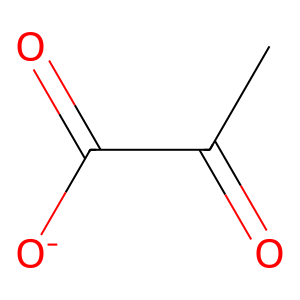

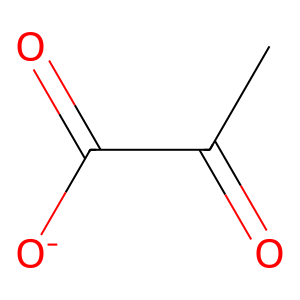

The two compounds are the same.


In [1]:
# Import necessary libraries from RDKit
from rdkit import Chem
from rdkit.Chem import Draw

# Define two SMILES strings representing chemical compounds
# SMILES is a notation to represent the structure of a chemical molecule
smiles1 = "CC(=O)C(=O)[O-]"  # This represents a molecule with two carboxyl groups
smiles2 = "CC(=O)C([O-])=O"  # Another representation of the same molecule but with a slightly different SMILES

# Convert SMILES strings to molecule objects using RDKit's MolFromSmiles function
mol1 = Chem.MolFromSmiles(smiles1)  # This creates a molecule object from the first SMILES
mol2 = Chem.MolFromSmiles(smiles2)  # This creates a molecule object from the second SMILES

# Generate images of the molecules to visualize their structures
img1 = Draw.MolToImage(mol1)  # Create an image of the first molecule
img2 = Draw.MolToImage(mol2)  # Create an image of the second molecule

# Display the generated images of the molecules
img1.show()  # Show the image of the first molecule
img2.show()  # Show the image of the second molecule

# Check if the two molecules are the same
inchikey1 = Chem.MolToInchiKey(mol1)
inchikey2 = Chem.MolToInchiKey(mol2)

# compare results
if inchikey1 == inchikey2:
    print("The two compounds are the same.")
else:
    print("The two compounds are different.")


#### **Question 4** Are the compounds represented by the SMILES C(C(=O)COP(=O)(O)O)O and OCC(=O)COP(O)(O)=O the same? Write the answer here and type the code in the box below

-
___________________________________________________________________________________


In [2]:
# Type your code here

## 4. Compound Feature Extraction Methods<a id="compound-feature-extraction-methods"></a>


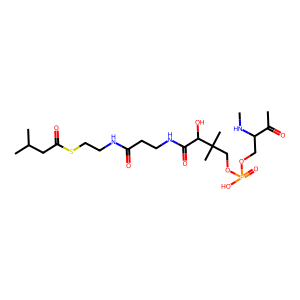

In [3]:
from rdkit import Chem
from rdkit.Chem import Draw
# smiles of a molecule
smiles = 'CNC(CO[P@TB13](=O)(O)OCC(C)(C)C(O)C(=O)NCCC(=O)NCCSC(=O)CC(C)C)C(C)=O' 

# smiles to molecule
mol = Chem.MolFromSmiles(smiles)

# visualize molecule
Draw.MolToImage(mol)

### 4.1 Molecular Fingerprints
- **Definition**: A molecular fingerprint is a method of converting the structure of a molecule into a fixed-length binary vector. This vector represents the presence or absence of specific substructures or features within the molecule.
- **Example**:
  - **Morgan Fingerprint (ECFP)**: Extended-Connectivity Fingerprints are a type of circular fingerprint that captures the local environment of each atom in a molecule. For instance, an ECFP4 fingerprint with a radius of 2 and a bit vector length of 1024 bits can be generated using RDKit.
  - **MACCS Keys**: MACCS (Molecular ACCess System) keys are another type of molecular fingerprint that uses a predefined set of 166 structural keys.
  - **RDKit Example Code**:

In [4]:
# Import necessary libraries from RDKit
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np

# Load a molecule from a SMILES string ('CCO' represents ethanol)
mol = Chem.MolFromSmiles('CCO')  # SMILES 'CCO' corresponds to the molecule ethanol (C2H5OH)

# Generate the Morgan fingerprint (also known as the circular fingerprint)
# The '2' is the radius of the fingerprint, and '1024' is the number of bits in the fingerprint
# This generates a bit vector representation of the molecular structure
fp1 = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)

# Convert the fingerprint to a numpy array for further processing or analysis
fingerprint_array1 = np.array(fp1)

# Print the fingerprint as a numpy array and its shape (number of bits in the fingerprint)
print('Morgan Fingerprint is ', fingerprint_array1, '\n Its shape is', fingerprint_array1.shape)  # Shape should be (1024,) since it's a 1024-bit vector

# Generate the MACCS keys fingerprint (a set of 166 predefined bit features for a molecule)
fp2 = AllChem.GetMACCSKeysFingerprint(mol)

# Convert the MACCS keys fingerprint to a numpy array
fingerprint_array2 = np.array(fp2)

# Print the MACCS keys fingerprint and its shape (should be (166,) since there are 166 features in the MACCS keys)
print('MACCS keys fingerprint is ', fingerprint_array2, '\n Its shape is', fingerprint_array2.shape)


Morgan Fingerprint is  [0 0 0 ... 0 0 0] 
 Its shape is (1024,)
MACCS keys fingerprint is  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0] 
 Its shape is (167,)


[09:27:41] DEPRECATION WARNING: please use MorganGenerator


#### **Question 4** Can you use the Morgan Fingerprint to calculate similarity of two compounds? You need to fill the code below
- SMILES for Compound 1 CC(=O)C(=O)[O-]
- SMILES for compound 2 C(C(=O)COP(=O)(O)O)O



___________________________________________________________________________________

In [5]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs import FingerprintSimilarity

# Function to generate Morgan fingerprints
def get_morgan_fingerprint(smiles, radius=2, nBits=2048):
    """
    Generates a Morgan fingerprint (circular fingerprint) for a given molecule represented by SMILES.
    
    Parameters:
    - smiles (str): The SMILES string representing the molecule.
    - radius (int): The radius of the fingerprint (default is 2).
    - nBits (int): The length of the fingerprint bit vector (default is 2048).
    
    Returns:
    - The Morgan fingerprint as a bit vector.
    """
    # Convert the SMILES string into a molecule object
    mol = Chem.MolFromSmiles(smiles)
    
    # Check if the molecule is valid
    if mol is None:
        raise ValueError(f"Invalid SMILES: {smiles}")
    
    # Generate and return the Morgan fingerprint as a bit vector
    return AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nBits)

# SMILES for two compounds 
'''#################### YOU NEED TO CHANGE THIS PART ############################### PAY ATTENTION HERE ################################################'''
smiles1 = ""  
smiles2 = ""
'''#################### YOU NEED TO CHANGE THIS PART ############################### PAY ATTENTION HERE ################################################'''

# Generate Morgan fingerprints for the two compounds
fp1 = get_morgan_fingerprint(smiles1)
fp2 = get_morgan_fingerprint(smiles2)

# Calculate the Tanimoto similarity between the two fingerprints
similarity = FingerprintSimilarity(fp1, fp2)

# Output the similarity score with a description
print(f"Similarity between the two compounds ({smiles1} and {smiles2}): {similarity:.4f}")
# This prints the Tanimoto similarity between the two compounds, which indicates how similar they are based on their fingerprints.


Similarity between the two compounds ( and ): 1.0000


[09:27:41] DEPRECATION WARNING: please use MorganGenerator
[09:27:41] DEPRECATION WARNING: please use MorganGenerator


### 4.2 One-Hot Encoding of Molecules
- **Definition**: One-Hot encoding is a method of converting the atoms in a molecule into a fixed-length binary vector. Each position in the vector corresponds to a specific atom type, and the value at that position is 1 if the atom is present at that position in the molecule, and 0 otherwise. This method captures the exact sequence of atoms in the molecule.
- **Example**:
  - **One-Hot Encoding**: For a given molecule represented by its SMILES string, we can convert each atom in the molecule to a One-Hot encoded vector. For example, consider the molecule "CCO" (ethanol). The One-Hot encoding for this molecule can be generated using a predefined set of atoms.
  - **RDKit Example Code**:

One-Hot matrix representation of smiles is:
[[1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
Its shape is  (20, 10)


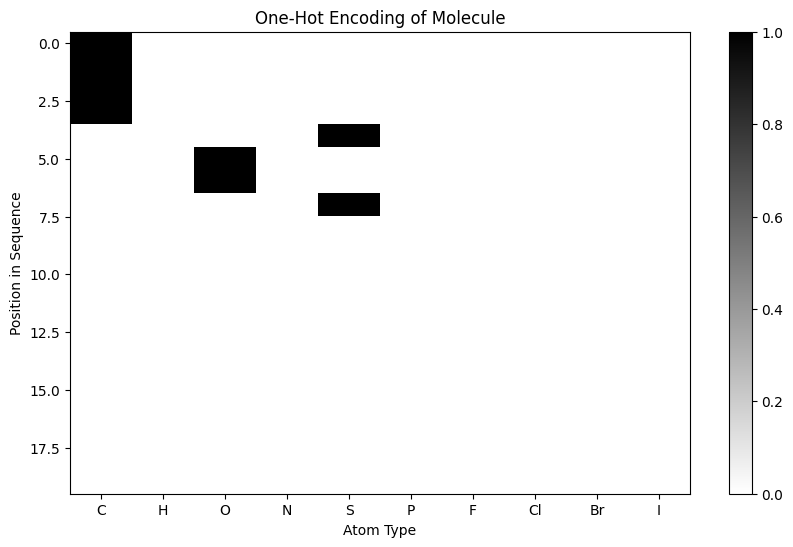

In [6]:
import numpy as np
from rdkit import Chem
import matplotlib.pyplot as plt

# Define a list of atoms to be used in the one-hot encoding process
atoms = ['C', 'H', 'O', 'N', 'S', 'P', 'F', 'Cl', 'Br', 'I']

# Create a dictionary that maps each atom symbol to an index
# This allows quick lookup of atom indices for one-hot encoding
atom_to_index = {atom: i for i, atom in enumerate(atoms)}

def smiles_to_one_hot(smiles, atom_to_index, max_length=20):
    """
    Converts a SMILES string into a one-hot encoded matrix representation of the atoms.
    
    Parameters:
    - smiles (str): The SMILES representation of a molecule.
    - atom_to_index (dict): A dictionary mapping atom symbols to indices.
    - max_length (int): The maximum number of atoms to consider in the one-hot encoding.
    
    Returns:
    - one_hot_matrix (np.ndarray): A matrix of shape (max_length, len(atom_to_index)), 
      where each row represents one atom and its presence is encoded as a one-hot vector.
    """
    
    # Convert the SMILES string to an RDKit molecule object
    mol = Chem.MolFromSmiles(smiles)
    
    # Check if the SMILES string is valid
    if mol is None:
        raise ValueError("Invalid SMILES string")
    
    # Extract the atom symbols from the molecule
    atom_symbols = [atom.GetSymbol() for atom in mol.GetAtoms()]
    
    # If the molecule has more atoms than the max_length, truncate it
    if len(atom_symbols) > max_length:
        atom_symbols = atom_symbols[:max_length]
    
    # Initialize a matrix of zeros with dimensions (max_length, number of unique atoms)
    one_hot_matrix = np.zeros((max_length, len(atom_to_index)), dtype=int)
    
    # Fill the one-hot matrix with 1s in the appropriate positions based on the atom symbols
    for i, symbol in enumerate(atom_symbols):
        if symbol in atom_to_index:
            # Set the corresponding position in the matrix to 1
            one_hot_matrix[i, atom_to_index[symbol]] = 1
        else:
            raise ValueError(f"Unknown atom: {symbol}")
    
    return one_hot_matrix

smiles = "C(C(C(CS)O)O)S"

# Get the one-hot encoded matrix for the molecule
one_hot_matrix = smiles_to_one_hot(smiles, atom_to_index)

# Print the shape and content of the one-hot matrix
print("One-Hot matrix representation of smiles is:")
print(one_hot_matrix)
print('Its shape is ', one_hot_matrix.shape)
# Plotting the one-hot matrix
plt.figure(figsize=(10, 6))

# Display the one-hot matrix as an image (each row is an atom, each column is an atom type)
plt.imshow(one_hot_matrix, cmap='binary', aspect='auto')

# Add a colorbar to show the binary color scale (black for 0, white for 1)
plt.colorbar()

# Set the title and axis labels for the plot
plt.title('One-Hot Encoding of Molecule')
plt.xlabel('Atom Type')  # The x-axis represents the atom types (e.g., C, N, O)
plt.ylabel('Position in Sequence')  # The y-axis represents the position of atoms in the molecule

# Set the x-axis ticks to show the atom symbols
plt.xticks(ticks=np.arange(len(atom_to_index)), labels=atoms)

# Display the plot
plt.show()


### 4.3 MPNN
- **Definition**: MPNNs (Message Passing Neural Networks) are neural network architectures specifically designed for learning from graph-structured data, particularly in the field of cheminformatics and drug discovery. These networks operate by iteratively passing messages between nodes (atoms) in a molecular graph, allowing them to capture local chemical environments and relationships. MPNNs offer several advantages, including flexibility, interpretability, and transferability, making them valuable for molecular representation learning and predictive modeling tasks.
- **Example**:
  - **Graph Representation**: In a molecular graph, atoms are represented as nodes, and bonds are represented as edges. Each node has a feature vector that can include atomic properties such as atomic number, valence, and hybridization.
  - **Message Passing**: During the message passing phase, each node aggregates information from its neighboring nodes. This process is repeated for several iterations to allow information to propagate through the graph.
  - **PyTorch Geometric Example Code**:

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import MessagePassing, global_mean_pool
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt

# Example SMILES for ibuprofen (used for generating MPNN embedding)
ibuprofen_smiles = "CC(C)CC1=CC=C(C=C1)C(C)C(=O)O"

# Convert SMILES to RDKit molecule object
ibuprofen_molecule = Chem.MolFromSmiles(ibuprofen_smiles)
AllChem.Compute2DCoords(ibuprofen_molecule)  # Generate 2D coordinates for visualization

# Define function to extract atom features, which include atomic number, degree, formal charge, hybridization, and aromaticity
def atom_features(atom):
    return [
        atom.GetAtomicNum(),  # Atomic number
        atom.GetDegree(),     # Number of bonds the atom has
        atom.GetFormalCharge(),  # Formal charge on the atom
        int(atom.GetHybridization()),  # Hybridization state (sp, sp2, sp3, etc.)
        atom.GetIsAromatic()  # Whether the atom is part of an aromatic ring
    ]

# Convert the molecule to a graph (nodes represent atoms, edges represent bonds)
def mol_to_graph(mol):
    # Create a list of atom features
    atom_features_list = []
    for atom in mol.GetAtoms():
        atom_features_list.append(atom_features(atom))
    
    # Create edge index (bonds between atoms)
    edge_index = []
    for bond in mol.GetBonds():
        i = bond.GetBeginAtomIdx()  # Get the index of the first atom in the bond
        j = bond.GetEndAtomIdx()    # Get the index of the second atom in the bond
        edge_index.append([i, j])   # Add both directions (i -> j and j -> i)
        edge_index.append([j, i])
    
    # Convert atom features to a tensor
    x = torch.tensor(atom_features_list, dtype=torch.float)
    # Convert edge indices to a tensor and ensure correct shape
    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    
    return Data(x=x, edge_index=edge_index)

# Generate the graph for ibuprofen molecule
graph = mol_to_graph(ibuprofen_molecule)

# Print number of nodes (atoms) and edges (bonds) in the graph
# Nodes represent atoms, and edges represent bonds between atoms
print("Number of nodes (atoms):", graph.num_nodes)  # Print the number of atoms in ibuprofen
print("Number of edges (bonds):", graph.num_edges)  # Print the number of bonds in ibuprofen

# Define the Message Passing Neural Network (MPNN) class
class MPNN(MessagePassing):
    def __init__(self, in_channels, out_channels):
        super(MPNN, self).__init__(aggr='add')  # Use 'add' as the aggregation method (summing messages)
        self.lin = nn.Linear(in_channels, out_channels)  # A linear layer to transform node features

    def forward(self, x, edge_index):
        # Apply the propagation (message passing) through the network
        return self.propagate(edge_index, x=self.lin(x))  # Apply linear transformation and propagate messages

    def message(self, x_j):
        # In this example, the message is simply the features of neighboring atoms (no transformation)
        return x_j

    def update(self, aggr_out):
        # The update function returns the aggregated messages (which are the updated node features)
        return aggr_out

# Define a Graph-Level MPNN model that processes the graph and produces a final representation
class GraphLevelMPNN(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GraphLevelMPNN, self).__init__()
        self.conv1 = MPNN(in_channels, 64)  # First MPNN layer with 64 output channels
        self.conv2 = MPNN(64, 64)          # Second MPNN layer with 64 output channels
        self.lin = nn.Linear(64, out_channels)  # Final linear layer to output the desired embedding size

    def forward(self, data):
        # Apply the MPNN layers and a global pooling operation
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))  # Apply first MPNN layer and ReLU activation
        x = F.relu(self.conv2(x, edge_index))  # Apply second MPNN layer and ReLU activation
        x = global_mean_pool(x, data.batch)   # Global mean pooling to obtain a graph-level representation
        x = self.lin(x)                       # Apply the final linear layer to get the output
        return x  

# Instantiate the model with the input feature size and output size (embedding dimension)
mpnn_model = GraphLevelMPNN(graph.x.shape[1], 320)  

# Create a batch tensor (necessary for batching multiple graphs, even though we only have one graph here)
graph.batch = torch.zeros(graph.num_nodes, dtype=torch.long)

# Get the embedding representation of ibuprofen
mpnn_output = mpnn_model(graph)

# Print the MPNN embedding representation for ibuprofen molecule
print("The MPNN representation embedding for ibuprofen is:\n", mpnn_output)
# This output is the final graph-level representation (embedding) of the ibuprofen molecule


Number of nodes (atoms): 15
Number of edges (bonds): 30
The MPNN representation embedding for ibuprofen is:
 tensor([[ 0.8291,  0.6360, -0.1071, -0.5261, -0.8750,  0.0168,  0.5040,  0.2529,
         -0.3585,  0.5732, -0.1193, -1.8223, -0.2844, -1.3896,  0.3529, -0.1626,
         -0.1381,  0.1920,  0.0647, -1.5791,  0.7578, -0.0174,  0.4765, -0.6177,
          0.7376,  0.0227, -2.0477, -0.3323, -1.0246, -0.8844, -1.8863,  0.8229,
          0.4655,  0.9537,  0.2098, -2.2446, -1.7028,  1.1358, -2.0593,  1.9433,
         -0.4724,  0.9573,  0.3564, -2.3755, -1.0164, -0.0398, -1.6084,  0.6844,
          1.1616, -0.4121, -0.5710,  0.8386,  0.0956, -2.0685, -0.2076,  0.3477,
          0.3590, -0.7218, -0.2269,  0.2811,  1.0497,  0.7104, -1.0327, -1.0135,
         -0.9763, -0.3517,  0.0276,  1.0613, -1.2184,  1.1895,  1.2182,  1.5386,
          2.5415,  0.0305,  0.2555,  0.3081,  0.2234, -1.0811,  0.4139, -3.0292,
          1.1515, -1.6626,  0.2465,  1.1311,  0.1724,  1.7073, -1.9658,  0.0270,


#### **Question 5** Can you generate the MPNN representation for CC(=O)C(=O)[O-]?


-
___________________________________________________________________________________

In [8]:
# Type the code here

### 4.4 GCN
- **Definition**: GCN (Graph Convolutional Network) is a neural network architecture specifically designed for learning from graph-structured data. It extends the concept of convolutional neural networks (CNNs) to operate on graphs, enabling the capture of relationships and dependencies between nodes. GCNs initialize nodes with feature vectors, pass messages between neighboring nodes, aggregate information, and update node features through layers of neural network operations. They offer several advantages, such as parameter sharing, capturing local connectivity, and scalability, making them suitable for tasks like Drug-Target Interaction (DTI) prediction.
- **Example**:
  - **Graph Representation**: In a molecular graph, atoms are represented as nodes, and bonds are represented as edges. Each node has a feature vector that can include atomic properties such as atomic number, valence, and hybridization.
  - **Convolutional Layers**: GCNs use convolutional layers to aggregate information from neighboring nodes. Each layer updates the node features based on the aggregated information from its neighbors.
  - **PyTorch Geometric Example Code**:

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv, global_mean_pool
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt

# Define the SMILES string for the ibuprofen molecule
ibuprofen_smiles = "CC(C)CC1=CC=C(C=C1)C(C)C(=O)O"

# Convert SMILES string to an RDKit molecule object
ibuprofen_molecule = Chem.MolFromSmiles(ibuprofen_smiles)

# Compute 2D coordinates for visualization (this step is not used in the model but can be helpful for visualizing the molecule)
AllChem.Compute2DCoords(ibuprofen_molecule)

# Function to extract atomic features for each atom in the molecule
def atom_features(atom):
    """
    Extracts features for each atom in the molecule.
    Features include atomic number, degree, formal charge, hybridization state, and aromaticity.
    """
    return [
        atom.GetAtomicNum(),  # Atomic number
        atom.GetDegree(),     # Number of bonds the atom has
        atom.GetFormalCharge(),  # Formal charge on the atom
        int(atom.GetHybridization()),  # Hybridization state (sp, sp2, sp3, etc.)
        atom.GetIsAromatic()  # Whether the atom is part of an aromatic ring
    ]

# Function to convert an RDKit molecule into a graph representation
def mol_to_graph(mol):
    """
    Converts the molecule into a graph where:
    - Nodes represent atoms and their features.
    - Edges represent bonds between atoms.
    """
    atom_features_list = []
    
    # Extract features for each atom in the molecule
    for atom in mol.GetAtoms():
        atom_features_list.append(atom_features(atom))
    
    edge_index = []
    
    # Create edges based on bonds between atoms
    for bond in mol.GetBonds():
        i = bond.GetBeginAtomIdx()  # Index of the first atom in the bond
        j = bond.GetEndAtomIdx()    # Index of the second atom in the bond
        edge_index.append([i, j])   # Add directed edge (i -> j)
        edge_index.append([j, i])   # Add reverse edge (j -> i) to make it undirected
    
    # Convert atom features and edge indices to PyTorch tensors
    x = torch.tensor(atom_features_list, dtype=torch.float)  # Node features tensor
    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()  # Edge indices tensor (must be in COO format)
    
    # Return a Data object representing the graph
    return Data(x=x, edge_index=edge_index)

# Convert the ibuprofen molecule to a graph
graph = mol_to_graph(ibuprofen_molecule)

# Print the number of nodes (atoms) and edges (bonds) in the graph
# Nodes represent atoms, and edges represent bonds between atoms
print("Number of nodes (atoms):", graph.num_nodes)  # Number of atoms in ibuprofen molecule
print("Number of edges (bonds):", graph.num_edges)  # Number of bonds in ibuprofen molecule


# Define a Graph Convolutional Network (GCN) model
class GraphLevelGCN(nn.Module):
    def __init__(self, in_channels, out_channels):
        """
        Initialize the GCN model. 
        - The model consists of two GCN layers followed by a linear layer to produce the final output representation.
        """
        super(GraphLevelGCN, self).__init__()
        # First GCN convolutional layer: maps input feature size to 64
        self.conv1 = GCNConv(in_channels, 64)
        # Second GCN convolutional layer: maintains 64 features
        self.conv2 = GCNConv(64, 64)
        # Linear layer to map from 64 features to the output size (320 in this case)
        self.lin = nn.Linear(64, out_channels)

    def forward(self, data):
        """
        Forward pass through the GCN model.
        - Propagate features through the GCN layers and apply global pooling.
        """
        x, edge_index = data.x, data.edge_index
        # Apply the first GCN layer and ReLU activation
        x = F.relu(self.conv1(x, edge_index))
        # Apply the second GCN layer and ReLU activation
        x = F.relu(self.conv2(x, edge_index))
        # Apply global mean pooling to aggregate node features into a single graph-level representation
        x = global_mean_pool(x, data.batch)
        # Final linear transformation to produce the output
        x = self.lin(x)
        return x 

# Initialize the GCN model with input channels matching the atom feature size (5)
gcn_model = GraphLevelGCN(graph.x.shape[1], 320)  # Output dimension is 320

# Create a batch attribute for the graph (necessary for pooling)
# Since we're using a single graph, all nodes belong to the same batch (batch=0 for all nodes)
graph.batch = torch.zeros(graph.num_nodes, dtype=torch.long)

# Get the output representation of the graph from the GCN model
gcn_output = gcn_model(graph)

# Print the resulting graph-level representation from the GCN
print("The GCN representation of ibuprofen:", gcn_output)
# This prints the learned representation (embedding) of the ibuprofen molecule.


Number of nodes (atoms): 15
Number of edges (bonds): 30
The GCN representation of ibuprofen: tensor([[ 2.1937e-01, -1.7263e-01, -4.2123e-02, -1.8637e-01, -2.2766e-01,
         -8.7076e-02, -4.9990e-02,  3.5458e-01, -2.1627e-02,  3.2560e-01,
         -2.2269e-01, -4.7563e-01,  4.4954e-01, -2.3434e-01,  8.5382e-02,
         -6.6744e-02, -4.1274e-01,  1.4332e-01,  1.9644e-01, -1.6070e-01,
          5.6365e-01, -1.2311e-01,  3.1481e-01, -2.5899e-01,  1.8560e-01,
          1.8332e-01,  1.5827e-01, -1.3386e-01, -5.0852e-01, -4.3002e-02,
          4.0954e-01,  4.4419e-01,  1.0676e-01, -2.5604e-01, -2.3106e-01,
          8.7109e-03, -1.1566e-01,  7.5934e-02, -3.4297e-01,  2.2485e-01,
          5.7848e-01,  7.7460e-03, -2.6198e-01, -4.1147e-01,  3.9021e-02,
         -4.4996e-01,  5.3077e-03, -1.7318e-01, -1.4519e-01, -3.0002e-01,
          1.5225e-01,  2.0961e-01, -1.3151e-01, -1.5932e-03,  1.6788e-01,
         -4.0302e-01, -2.7791e-01, -1.3637e-01,  4.1065e-01, -1.3973e-01,
         -2.5952e-0

## 5. Sequence Feature Extraction <a id="sequence-feature-extraction"></a>

### 5.1 One-hot Encoding
- **Definition**: One-hot encoding is a method of representing each amino acid in a protein sequence as a binary vector. In this representation, each amino acid is mapped to a unique position in the vector, and only that position is set to 1, while all other positions are set to 0.
- **Example**:
  - Consider a simplified example where we have an amino acid sequence "ACDE" and the possible amino acids are "A", "C", "D", and "E".
  - The one-hot encoding for this sequence would be:

    | Amino Acid | A | C | D | E |  
    |------------|---|---|---|---|  
    | A          | 1 | 0 | 0 | 0 |  
    | C          | 0 | 1 | 0 | 0 |  
    | D          | 0 | 0 | 1 | 0 |  
    | E          | 0 | 0 | 0 | 1 |  
  - So the representation of A is: [1,0,0,0]

In [10]:
import numpy as np

# Function to perform one-hot encoding of the amino acid sequence
def one_hot_encode(seq):
    """
    This function takes an amino acid sequence as input and returns a one-hot encoded numpy array.
    Each amino acid in the sequence is mapped to a 20-dimensional vector (one-hot encoded).
    """
    # Define a dictionary that maps each amino acid to a unique integer
    aa_to_int = {'A': 0, 'C': 1, 'D': 2, 'E': 3, 'F': 4,
                 'G': 5, 'H': 6, 'I': 7, 'K': 8, 'L': 9,
                 'M': 10, 'N': 11, 'P': 12, 'Q': 13, 'R': 14,
                 'S': 15, 'T': 16, 'V': 17, 'W': 18, 'Y': 19}
    
    # Initialize an array of zeros with shape (len(seq), 20), where 20 represents the amino acid alphabet size
    one_hot_array = np.zeros((len(seq), 20))
    
    # Iterate over the amino acid sequence and update the one-hot array
    for i, amino_acid in enumerate(seq):  # Enumerate gives both index and amino acid
        if amino_acid in aa_to_int:  # Ensure the amino acid is valid
            # Set the corresponding column to 1 based on the amino acid index
            one_hot_array[i, aa_to_int[amino_acid]] = 1
        else:
            raise ValueError("Unknown amino acid encountered: " + amino_acid)
    
    return one_hot_array

# Example amino acid sequence (protein sequence)
seq = "ACDEFGHIKLMNPQRSTVWYWVTSRQPNMLKIHGFEDCA"
# Alternatively, you can use a longer sequence (example shown in comment)
# seq = "MLDDRARMEAAKKEKVEQILAEFQLQEEDLKKVMRRMQKEMDRGLRLETHEEASVKMLPTYVRSTPEGSEVGDFLSLDLGGTNFRVMLVKVGEGEEGQWSVKTKHQMYSIPEDAMTGTAEMLFDYISECISDFLDKHQMKHKKLPLGFTFSFPVRHEDIDKGILLNWTKGFKASGAEGNNVVGLLRDAIKRRGDFEMDVVAMVNDTVATMISCYYEDHQCEVGMIVGTGCNACYMEEMQNVELVEGDEGRMCVNTEWGAFGDSGELDEFLLEYDRLVDESSANPGQQLYEKLIGGKYMGELVRLVLLRLVDENLLFHGEASEQLRTRGAFETRFVSQVESDTGDRKQIYNILSTLGLRPSTTDCDIVRRACESVSTRAAHMCSAGLAGVINRMRESRSEDVMRITVGVDGSVYKLHPSFKERFHASVRRLTPSCEITFIESEEGSGRGAALVSAVACKKACMLGQ"

# Perform one-hot encoding on the defined sequence
encoded_seq = one_hot_encode(seq)

# Print the resulting one-hot encoded array
print("One-Hot Encoded Array of Sequence Is:")
print(encoded_seq)

# Note:
# The one-hot encoded representation is a matrix where:
# - Each row corresponds to an amino acid in the sequence.
# - Each column corresponds to one of the 20 standard amino acids.
# A '1' in the matrix indicates the presence of that amino acid at the given position in the sequence.
# '0's indicate the absence of the other amino acids at that position.
#
# This encoding is useful for machine learning tasks, such as:
# - Protein classification
# - Sequence analysis
# - Feature extraction for protein structure prediction


One-Hot Encoded Array of Sequence Is:
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 

### 5.2 K-mer (N-gram) Encoding
- **Definition**: K-mer encoding, also known as N-gram encoding, involves breaking down a sequence into substrings of length k and counting the frequency of each substring. This method is commonly used in bioinformatics to capture local sequence patterns.
- **Example**:
  - Consider a simplified amino acid sequence "ACDEFG" and let's use k = 3.
  - The sequence will be broken down into the following 3-mers: "ACD", "CDE", "DEF", "EFG".
  - We then count the frequency of each 3-mer.

  - **Python Example Code**:

In [11]:
import numpy as np
from collections import defaultdict
import pandas as pd

def extract_ngrams(seq, n=3):
    """
    Extract n-grams from a protein sequence.
    This function takes a sequence and a specified n (default 3) and returns a list of n-grams from the sequence.
    E.g., for n=3 and seq="MKQAWFI", it will return ['MKQ', 'KQA', 'QAW', 'AWF', 'WFI'].
    """
    ngrams = [seq[i:i+n] for i in range(len(seq)-n+1)]  # List comprehension to extract all n-grams of length n
    return ngrams

def build_ngram_index(ngrams_list):
    """
    Build an index for n-grams to map each unique n-gram to a unique number.
    This function uses a defaultdict to create an index that maps each n-gram to an integer.
    The index starts from 1 for the first unique n-gram.
    """
    index = defaultdict(int)  # Default to 0 for unseen n-grams
    for ngrams in ngrams_list:
        for ngram in ngrams:
            if ngram not in index:
                index[ngram] = len(index) + 1  # Assign a unique index starting from 1
    return index

def vectorize_sequences(ngrams_list, ngram_index):
    """
    Convert lists of n-grams into a fixed-size vector based on the n-gram index.
    This function converts the list of n-grams into a binary vector of length equal to the number of unique n-grams.
    For each sequence, it marks the occurrence of each n-gram.
    """
    vector_length = len(ngram_index)  # The size of the vector is equal to the number of unique n-grams
    vectors = np.zeros((len(ngrams_list), vector_length))  # Initialize a zero matrix for the vectors
    
    for i, ngrams in enumerate(ngrams_list):
        for ngram in ngrams:
            if ngram in ngram_index:
                vectors[i, ngram_index[ngram] - 1] += 1  # Increment the position based on the n-gram index
    return vectors
# Example protein sequences
sequences = ["MKQAWFI", "MRRKQLEDKVEELLSKNYHLENEVARLKKLVMKQAWFIWFIWFI"]

# Extract 3-grams from each sequence
n = 3
ngrams_list = [extract_ngrams(seq, n) for seq in sequences]
# print("ngrams_list:", ngrams_list)

# Build the index for the extracted n-grams
ngram_index = build_ngram_index(ngrams_list)
# print("ngram_index:", ngram_index)

# Convert sequences to fixed-size vectors based on the n-gram index
vectors = vectorize_sequences(ngrams_list, ngram_index)
# print("vectors:", vectors)

# use pandas to build DataFrame

sorted_ngrams = [ng for ng, idx in sorted(ngram_index.items(), key=lambda item: item[1])]

df = pd.DataFrame(data=vectors, columns=sorted_ngrams, index=[f"Sequence {i+1}" for i in range(len(vectors))])

print('The K-mer (N-gram) Encoding of sequences is:\n', vectors)
print('If using ngram_index as the table header, and vectors based on those indexes as the table contents, you can see this:')
df

The K-mer (N-gram) Encoding of sequences is:
 [[1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2.]]
If using ngram_index as the table header, and vectors based on those indexes as the table contents, you can see this:


,MKQ,KQA,QAW,AWF,WFI,MRR,RRK,RKQ,KQL,QLE,...,VAR,ARL,RLK,LKK,KKL,KLV,LVM,VMK,FIW,IWF
Sequence 1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sequence 2,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0


### 5.3 Protein Language Models
- **Definition**: Protein language models, such as ESM2 (Evolutionary Scale Modeling 2), are pre-trained deep learning models that can encode protein sequences into numerical representations. These models capture the contextual information and structural properties of amino acids in the sequence.
- **Example**:

   - if the download is slow, you can download the model from https://dl.fbaipublicfiles.com/fair-esm/models/esm2_t6_8M_UR50D.pt and put it in /data/home/{yourusername}/.cache/torch/hub/checkpoints/ 

In [12]:
import torch
import esm

def esm_method(sequence):
    """
    This function takes a protein sequence as input and returns the token embeddings from an ESM model.
    It uses the pre-trained ESM2 model to encode the sequence and retrieve the embeddings from the last layer.
    """
    # Set the device to GPU if available, else use CPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Load the pre-trained ESM2 model and its corresponding alphabet (vocabulary)
    model, alphabet = esm.pretrained.esm2_t6_8M_UR50D()
    model = model.to(device)  # Move the model to the appropriate device (GPU/CPU)
    model.eval()  # Set the model to evaluation mode (disables dropout, etc.)

    # Encode the input protein sequence into token IDs using the alphabet
    token_ids = torch.tensor([alphabet.encode(sequence)], device=device)

    # Get the embeddings by passing the token IDs through the model
    with torch.no_grad():  # Disable gradient computation to save memory
        results = model(token_ids, repr_layers=[6])  # Extract the representation from layer 6 (last layer)
        token_embeddings = results["representations"][6]  # Retrieve embeddings from the specified layer

    # Optionally, you can average the token embeddings over all tokens to get a single sequence embedding
    # sequence_embedding = token_embeddings.mean(dim=1)
    
    return token_embeddings  # Return the token embeddings for further processing

# Example protein sequence
sequence = "MKWVTFISLLFLFSSAYSAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA"

# Generate the token embeddings for the sequence
embeddings = esm_method(sequence)

# Print the shape and values of the generated embeddings
print("Encoded representations shape:", embeddings.shape)
print("Encoded representations:", embeddings)


Encoded representations shape: torch.Size([1, 60, 320])
Encoded representations: tensor([[[-0.0313,  0.3881,  0.0955,  ...,  0.6690,  0.2909,  0.0729],
         [-0.1609,  0.2093,  0.0697,  ...,  0.4281,  0.4911,  0.5022],
         [ 0.1472,  0.0726,  0.3179,  ...,  0.2554,  0.0315,  0.4004],
         ...,
         [-0.3541,  0.6165, -0.0967,  ...,  0.1098, -0.0994, -0.1894],
         [-0.3116,  0.6656, -0.0237,  ..., -0.0145, -0.0696, -0.0548],
         [-0.3939,  0.0645,  0.2356,  ...,  0.5939, -0.3346, -0.0885]]],
       device='cuda:0')


  - **Explanation**:
    - **Tokenization**: The sequence is tokenized using the ESM2 tokenizer, which converts the amino acid sequence into a format that the model can process.
    - **Model Output**: The model processes the tokenized sequence and produces embeddings. The `last_hidden_state` contains the contextualized embeddings for each amino acid in the sequence.
    - **Embedding Shape**: The embeddings have a shape of `[1, sequence_length, embedding_dim]`. For example, if the sequence length is 60 and the embedding dimension is 320, the shape will be `[1, 60, 320]`.


## 6. Clustering Practice <a id="clustering-practice"></a>

### 6.1 Protein Similarity Calculation
- **Overview**: Protein similarity calculation is a common task in bioinformatics, used to compare the similarity between proteins. The specific method of calculation can vary depending on the perspective and tools being used. For example, it can be based on sequence, structure, or functional domains. Here, we will focus on sequence-based similarity.

- **Example**:
  - Consider two protein sequences: "ACDEFG" and "ACDEGH"

  - **Python Example Code**:  


In [13]:
from Bio import pairwise2

def calculate_identity(seq1, seq2):
    # Perform a global pairwise sequence alignment.
    # The function globalxx uses a simple scoring system where matches score +1 and mismatches score 0.
    alignments = pairwise2.align.globalxx(seq1, seq2)

    # Extract the best alignment from the list of possible alignments.
    # alignments[0] contains the best alignment (highest score).
    best_alignment = alignments[0]

    # Extract the number of matches (positions where the two sequences have identical characters).
    matches = best_alignment[2]  # Matches are stored at index 2 of the alignment tuple.

    # Extract the total number of aligned elements (including gaps).
    total = best_alignment[4]  # The total number of aligned positions is stored at index 4.

    # Calculate the identity percentage: the proportion of matches to the total number of elements.
    identity_percent = (matches / total) * 100

    # Return the calculated identity percentage.
    return identity_percent

# Example sequences to compare
seq1 = 'MTEITAAMVKELRESTGAGMMDCKNALSETQHEWFAAKRQGKLSPWITGRKTGQDEHILLMNDGWQ'
seq2 = 'MTEITAAMVKELRESTGAGMMDCKNALSETQHEWFAALLMNDGWQ'

# Calculate the identity percentage between the two sequences
identity = calculate_identity(seq1, seq2)

# Print the identity percentage
identity


/data/home/jiahao/anaconda3/envs/lbxtest/lib/python3.12/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


68.18181818181817

### 6.2 Molecular Similarity Calculation
- **Tool**: RDKit
- **Example**:
  - Consider two chemical compounds represented by their SMILES strings: "CCO" (ethanol) and "CCOC" (ethyl methyl ether).
  - We will use the RDKit library to calculate the molecular similarity between these compounds using different types of molecular fingerprints.

In [14]:
# Importing necessary modules from RDKit
from rdkit import Chem  # RDKit's core functionality for handling molecules
from rdkit.Chem import AllChem  # RDKit's extended functionality for molecular computations
from rdkit.DataStructs import TanimotoSimilarity  # Function to calculate Tanimoto similarity between two bit vectors

# Step 1: Convert SMILES strings into RDKit molecule objects
mol1 = Chem.MolFromSmiles("CCO")  # Convert SMILES string for ethanol (C2H5OH) into a molecule object
mol2 = Chem.MolFromSmiles("CCCO")  # Convert SMILES string for propanol (C3H7OH) into a molecule object

# Step 2: Generate Morgan Fingerprints for each molecule
# Morgan fingerprint is a type of circular fingerprint (substructural representation of a molecule)
# '2' is the radius of the fingerprint (i.e., the number of bonds considered around each atom)
# '1024' is the length of the bit vector representing the fingerprint (higher bits = more detailed)
fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, 2, nBits=1024)  # Generate fingerprint for mol1 (ethanol)
fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, 2, nBits=1024)  # Generate fingerprint for mol2 (propanol)

# Step 3: Calculate the Tanimoto similarity between the two fingerprints
# The Tanimoto similarity measures how similar two sets (or bit vectors) are.
# A similarity score of 1 means the fingerprints are identical, and 0 means no similarity.
similarity = TanimotoSimilarity(fp1, fp2)

# Step 4: Output the similarity score
print(f"The tanimoto similarity between ethanol and propanol is: {similarity}")  # Print the Tanimoto similarity between ethanol and propanol


The tanimoto similarity between ethanol and propanol is: 0.5555555555555556


[09:27:47] DEPRECATION WARNING: please use MorganGenerator
[09:27:47] DEPRECATION WARNING: please use MorganGenerator


### t-SNE

t-SNE (t-distributed Stochastic Neighbor Embedding) is a machine learning algorithm for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. Unlike PCA (Principal Component Analysis), which focuses on preserving global structure, t-SNE aims to preserve local structure, making it especially useful for visualizing clusters and patterns in complex data.

- **Example**:

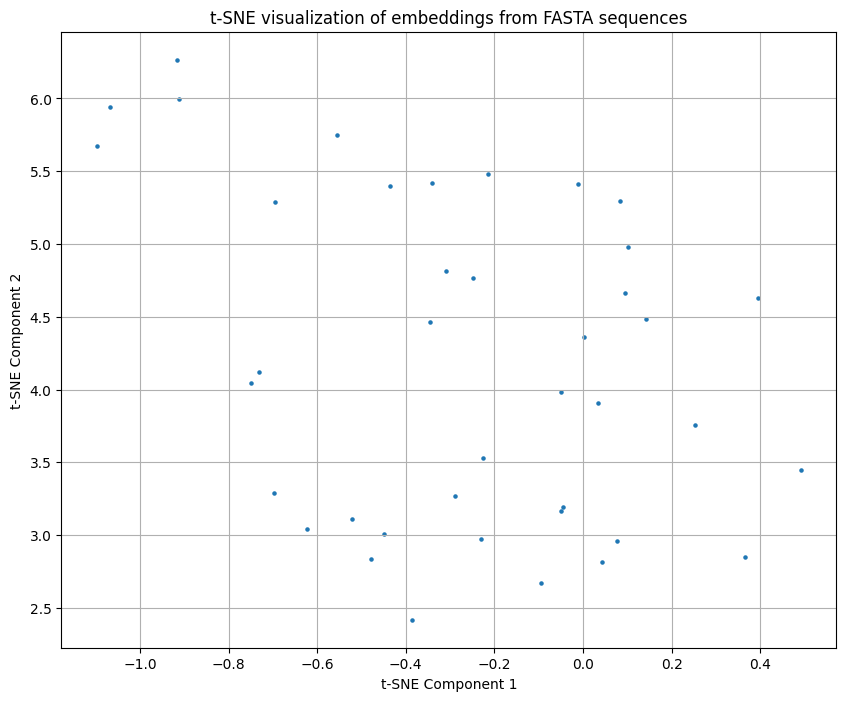

In [15]:
# Import necessary libraries
import pickle  # For loading the precomputed embeddings from a file
import numpy as np  # For numerical operations
import torch  # PyTorch library for tensor operations
from Bio import SeqIO  # Biopython for handling biological sequences in FASTA format
from sklearn.manifold import TSNE  # For dimensionality reduction using t-SNE
import matplotlib.pyplot as plt  # For plotting the 2D visualization

import esm  # For using the pre-trained ESM model (Evolutionary Scale Modeling)

# Function to obtain sequence embeddings using ESM model
def esm_method(sequence):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Check if GPU is available for faster processing

    # Load the pre-trained ESM model and its alphabet
    model, alphabet = esm.pretrained.esm2_t6_8M_UR50D()
    model = model.to(device)  # Move model to GPU if available
    model.eval()  # Set the model to evaluation mode

    # Encode the sequence into token IDs using the model's alphabet
    token_ids = torch.tensor([alphabet.encode(sequence)], device=device)
    
    # Pass the token IDs through the model to get the embeddings (representation of the sequence)
    with torch.no_grad():  # Disable gradient computation for inference
        results = model(token_ids, repr_layers=[6])  # Get the output embeddings from final layer
        token_embeddings = results["representations"][6]  # Extract the embeddings for this layer

    # Calculate the mean of the token embeddings to get a fixed-size representation for the entire sequence
    sequence_embedding = token_embeddings.mean(dim=1)
    return sequence_embedding

# Function to read sequences from a FASTA file
def read_fasta(file_path):
    sequences = []  # List to store sequences from the FASTA file
    for record in SeqIO.parse(file_path, "fasta"):  # Parse the FASTA file
        sequences.append(str(record.seq))  # Extract the sequence as a string
        if len(sequences) >= 40:  # Limit to first 40 sequences for demonstration
            break
    return sequences

# Example usage: Reading sequences from a FASTA file (this part is commented out as the file path is not provided)
# fasta_file = 'pr_dataset.fasta'
# sequences = read_fasta(fasta_file)

# embeddings = []  # List to store the sequence embeddings
# for seq in sequences:  # For each sequence in the FASTA file
#     embedding = esm_method(seq)  # Get the embedding for the sequence using ESM model
#     embeddings.append(embedding.cpu().detach().numpy())  # Convert tensor to NumPy array and store

# embeddings = np.vstack(embeddings)  # Stack all embeddings into a single matrix

# Alternatively, load precomputed embeddings from a pickle file (for demonstration)
embeddings = pickle.load(open('embedding.pkl', 'rb'))

# Apply t-SNE (t-distributed Stochastic Neighbor Embedding) to reduce the dimensionality of the embeddings
# from high-dimensional space to 2D for visualization
tsne = TSNE(n_components=2, random_state=42)  # Set the number of components (2D) and random seed for reproducibility
embeddings_2d = tsne.fit_transform(embeddings)  # Perform t-SNE dimensionality reduction

# Visualize the 2D representation of the embeddings using a scatter plot
plt.figure(figsize=(10, 8))  # Set figure size for better readability
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], s=5)  # Plot the 2D points with small markers
plt.title('t-SNE visualization of embeddings from FASTA sequences')  # Set title for the plot
plt.xlabel('t-SNE Component 1')  # Label for the X-axis
plt.ylabel('t-SNE Component 2')  # Label for the Y-axis
plt.grid()  # Display grid on the plot
plt.show()  # Show the plot



# Question:
Use what you've learned to solve the following problems and attach the relevant Python code at the end of the documentation.

3. **Download the FASTA sequence**: Retrieve the FASTA sequence of the protein with UniProt ID P12345 from UniProt database and save it to a local file named `P12345.fasta`. Ensure the format follows the standard FASTA conventions.


In [16]:
# Type your code here

4. **Find the most similar protein**: Given a protein A (P12345) and a dataset of protein sequences in `pr_dataset.fasta`, identify the protein in the dataset with the highest similarity to P12345 and output its sequence and the amino acid length.



In [17]:
# Type your code here
from Bio import SeqIO  # Biopython for handling biological sequences in FASTA format
def read_fasta(file_path):
    sequences = []  # List to store sequences from the FASTA file
    for record in SeqIO.parse(file_path, "fasta"):  # Parse the FASTA file
        sequences.append(str(record.seq))  # Extract the sequence as a string
    return sequences

fasta_file = 'pr_dataset.fasta'
sequences = read_fasta(fasta_file)

5. **Find similar molecules**: For a molecule B (ibuprofen, with its SMILES obtainable from PubChem) and a dataset of SMILES strings (`smiles_list`), find the top 3 molecules that have the highest similarity to ibuprofen and output their details.


In [18]:
# Type your code here
with open('smiles_list.txt', 'r') as f:
    smiles_dataset = [line.strip() for line in f]

6. **Clustering using Morgan Fingerprints**: Utilize the Morgan fingerprint method to represent the SMILES from `smiles_list.txt`, then perform clustering using t-SNE for visualization.

In [19]:
# Type your code here
with open('smiles_list.txt', 'r') as f:
    smiles_dataset = [line.strip() for line in f]

## Summary
- **Key Points** :
  - Feature extraction is an important step in understanding enzyme and substrate interactions.
  - Python and its related libraries provide strong tool support.
  - Multiple feature extraction methods can be combined to improve prediction accuracy.

## Reference materials
- **Books** :  
  - "Biopython Tutorial and Cookbook"
  - "Python for Data Analysis" by Wes McKinney
- **Online Resources** :
  - Biopython official documentation: https://biopython.org/
  - RDKit official documentation: https://www.rdkit.org/docs/index.html
  - PubChem official documentation: https://pubchem.ncbi.nlm.nih.gov/